## predicting heart diseases using machine learning
this notebook will look into various python-based machine learning and data science library in an attempt to build a ml model capable of predicting whether a person have heart diseases or not based on their medical attributes

we are going to take the following approach
1. problem defination
2. data
3. evaluation
4. features
5. modeling
6. experimentation


In [52]:
# import all the tools that we needed

#Regular EDA(exploratory data analysis) and ploting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve, auc
from sklearn.datasets import make_classification


In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart diseases frequency acc to sex
1 for male
,0 for female


In [6]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


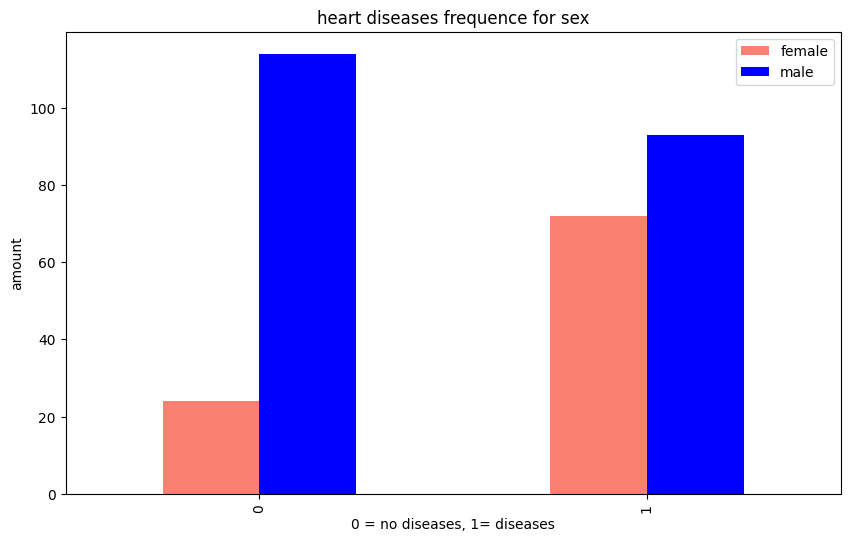

In [8]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","blue"])
plt.title("heart diseases frequence for sex")
plt.xlabel("0 = no diseases, 1= diseases")
plt.ylabel("amount")
plt.legend(["female","male"])

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


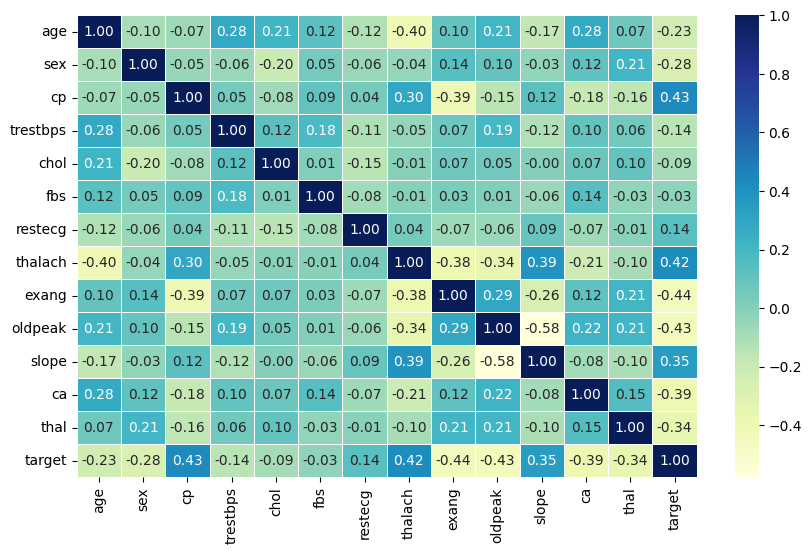

In [11]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidth=0.5,
                fmt = ".2f",
                cmap ="YlGnBu")

## Modeling

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# alot x and y from our dataset
x = df.drop("target",axis = 1)
y = df["target"]


In [14]:
#train test abd split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## we are going to try three different ml model
1. logistic regression
2. k nearest neighbours
3. RandomForestClassifier

In [15]:
# put model in a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    fits and evaluate given ml models
    '''
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [16]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparison

<Axes: >

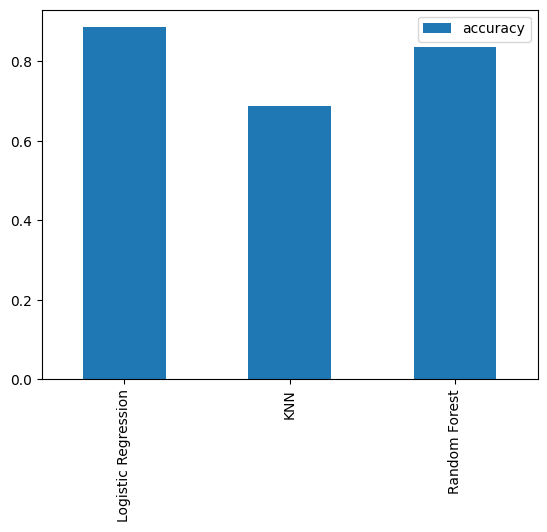

In [17]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

## Hyperparameter tuning

In [18]:
train_score = {}
test_score= {}
n_neighbors = np.arange(1,51)
for neighbor in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors = neighbor)
    KNN.fit(x_train,y_train)
    train_score[neighbor] = KNN.score(x_train,y_train)
    test_score[neighbor] = KNN.score(x_test,y_test)
    

In [19]:
print(train_score)
print(test_score)

{1: 1.0, 2: 0.8099173553719008, 3: 0.7727272727272727, 4: 0.743801652892562, 5: 0.7603305785123967, 6: 0.7520661157024794, 7: 0.743801652892562, 8: 0.7231404958677686, 9: 0.71900826446281, 10: 0.6942148760330579, 11: 0.7272727272727273, 12: 0.6983471074380165, 13: 0.6900826446280992, 14: 0.6942148760330579, 15: 0.6859504132231405, 16: 0.6735537190082644, 17: 0.6859504132231405, 18: 0.6652892561983471, 19: 0.6818181818181818, 20: 0.6694214876033058, 21: 0.6859504132231405, 22: 0.6694214876033058, 23: 0.7024793388429752, 24: 0.6735537190082644, 25: 0.6983471074380165, 26: 0.6942148760330579, 27: 0.6983471074380165, 28: 0.6859504132231405, 29: 0.6818181818181818, 30: 0.6735537190082644, 31: 0.6570247933884298, 32: 0.6652892561983471, 33: 0.6694214876033058, 34: 0.6487603305785123, 35: 0.6528925619834711, 36: 0.6611570247933884, 37: 0.6735537190082644, 38: 0.6528925619834711, 39: 0.6570247933884298, 40: 0.6570247933884298, 41: 0.6694214876033058, 42: 0.6735537190082644, 43: 0.6694214876033

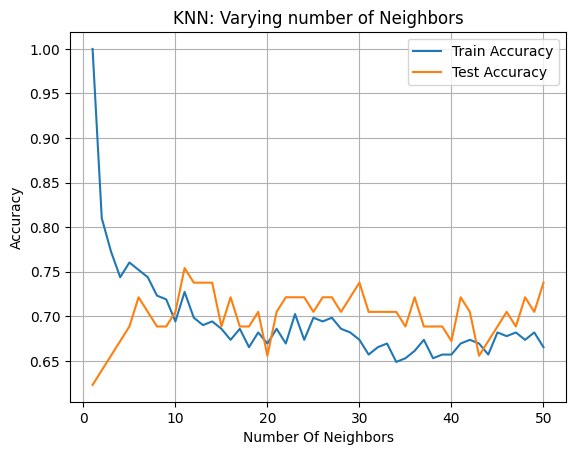

In [20]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
#plt.xlim(0, 33)
#plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

## hyperparameter tuning using randomized search cv

In [21]:
x = df.drop("target",axis = 1)
y = df["target"]
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [22]:
# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Different solvers for optimization
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200, 300]  # Number of iterations
}


In [23]:
# Corrected Hyperparameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': np.arange(10, 300, 10),  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Corrected max_features
    'max_depth': np.arange(5, 20, 2),  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}



In [24]:
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()


In [25]:
# RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid_lr, 
                                      n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search_lr.fit(x_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=42, verbose=1)

In [26]:
# RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid_rf, 
                                      n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])},
                   random_state=42, verbose=1)

In [27]:
# Best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", random_search_lr.best_params_)

# Best score for Logistic Regression
print("Best score for Logistic Regression:", random_search_lr.best_score_)


Best hyperparameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 300, 'C': 0.23357214690901212}
Best score for Logistic Regression: 0.8181122448979592


In [28]:
# Best hyperparameters for Random Forest
print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)

# Best score for Random Forest
print("Best score for Random Forest:", random_search_rf.best_score_)


Best hyperparameters for Random Forest: {'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 11, 'bootstrap': True}
Best score for Random Forest: 0.8345238095238094


In [29]:
# Evaluate Logistic Regression on test set
best_lr_model = random_search_lr.best_estimator_
test_score_lr = best_lr_model.score(x_test, y_test)
print("Logistic Regression Test Accuracy:", test_score_lr)


Logistic Regression Test Accuracy: 0.8852459016393442


In [30]:
# Evaluate Random Forest on test set
best_rf_model = random_search_rf.best_estimator_
test_score_rf = best_rf_model.score(x_test, y_test)
print("Random Forest Test Accuracy:", test_score_rf)


Random Forest Test Accuracy: 0.8524590163934426


In [31]:
model_scores


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## hyperparameter tuning using grid search cv
since our Logistic Regresion give best result so we try on that

In [32]:
x = df.drop("target",axis = 1)
y = df["target"]
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [33]:
# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength: inverse of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers for optimization
    'penalty': ['l2'],  # L2 regularization (liblinear supports L1 as well)
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}


In [34]:
# Initialize models
log_reg = LogisticRegression()

In [35]:
# Set up GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg, 
                              param_grid=param_grid_lr, 
                              cv=5,  # 5-fold cross-validation
                              verbose=1, 
                              n_jobs=-1,  # Use all available cores
                              scoring='accuracy')  # Use accuracy as the evaluation metric

# Fit GridSearchCV to the training data
grid_search_lr.fit(x_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [36]:
# Best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

# Best score for Logistic Regression
print("Best score for Logistic Regression:", grid_search_lr.best_score_)


Best hyperparameters for Logistic Regression: {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.8346088435374149


In [37]:
# Use the best model from GridSearchCV
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the model on the test set
test_score_lr = best_lr_model.score(x_test, y_test)
print("Logistic Regression Test Accuracy:", test_score_lr)


Logistic Regression Test Accuracy: 0.8852459016393442


## evaluating tuned ml model beyond accuracy
* roc curve and auc curve
* confusion matrix
* classification report
* precesion
* recall
* f1 score

In [40]:
y_preds = best_lr_model.predict(x_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test.value_counts()

target
1    32
0    29
Name: count, dtype: int64

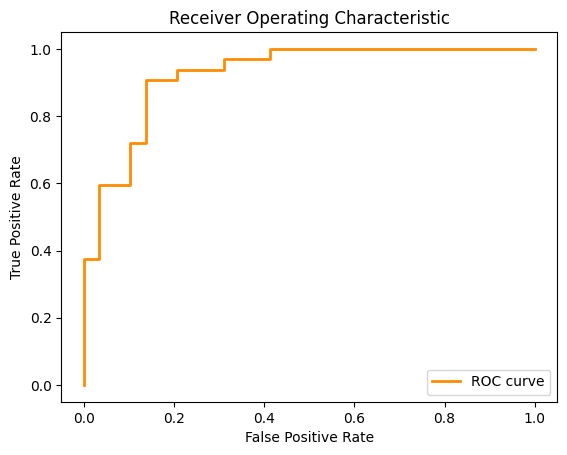

In [60]:
# plot roc curve
y_scores = best_lr_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [62]:
y_preds = best_lr_model.predict(x_test)
confusion_metrix = confusion_matrix(y_test,y_preds)
confusion_metrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

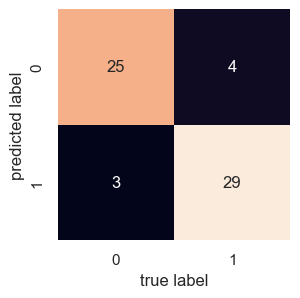

In [67]:
sns.set_theme(style="whitegrid")
def plot_conf_met(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_met(y_test,y_preds)

In [68]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [70]:
grid_search_lr.best_params_


{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [76]:
clf = LogisticRegression(
    C=0.23357214690901212,   # Regularization strength
    max_iter=100,            # Maximum number of iterations
    penalty='l2',            # Type of regularization
    solver='liblinear'       # Optimization algorithm
)

In [77]:
acc = cross_val_score(clf,
                      x,
                      y,
                     cv=5,
                     scoring="accuracy")
acc = np.mean(acc)
acc

0.8479781420765027

In [78]:
recall = cross_val_score(clf,
                      x,
                      y,
                     cv=5,
                     scoring="recall")
recall = np.mean(recall)
recall

0.9272727272727274

In [80]:
precision = cross_val_score(clf,
                      x,
                      y,
                     cv=5,
                     scoring="precision")
precision = np.mean(precision)
precision

0.8215873015873015

In [81]:
f1 = cross_val_score(clf,
                      x,
                      y,
                     cv=5,
                     scoring="f1")
f1 = np.mean(f1)
f1

0.8705403543192143

## feature importance

In [82]:
clf = LogisticRegression(
    C=0.23357214690901212,   # Regularization strength
    max_iter=100,            # Maximum number of iterations
    penalty='l2',            # Type of regularization
    solver='liblinear'       # Optimization algorithm
)
clf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [83]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [84]:
features_dic = dict(zip(df.columns,list(clf.coef_[0])))
features_dic

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

<Axes: title={'center': 'feature importance'}>

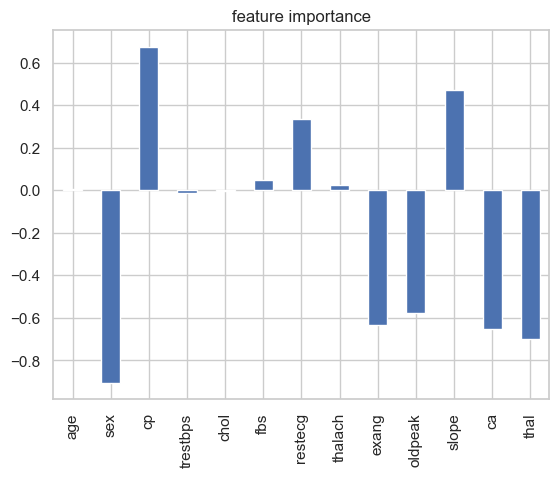

In [90]:
feature_df = pd.DataFrame(features_dic,index=[0])
feature_df.T.plot.bar(title = "feature importance",legend=False)